In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
# Read the Ride Data
# Read File and store into Pandas data frame
city_data = pd.read_csv(city_data_to_load)
city_data.head()
# city_data.count()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the City and Ride Data
# Read File and store into Pandas data frame
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
# ride_data.count()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
pybe_df = pd.merge(ride_data, city_data, how='inner', suffixes=('_rd', '_ct'))
# pybe_df.sort_values(by=['date'])

In [6]:
# Display the data table for preview
pybe_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types

# group_types = pybe_df.groupby(['city','type'])
# print(group_types.fare.mean())

urban_df = pybe_df.loc[pybe_df['type']=='Urban']
urban_df.head()
urban_grp = urban_df.groupby('city')
urban_count = urban_grp.city.count()
# print(urban_grp.fare.mean())
# print(urban_grp['driver_count'].value_counts().index.get_level_values('driver_count'))
urban_plot_df = pd.DataFrame({'Riders By City':urban_grp.city.count()
                              ,'Average Fare':urban_grp.fare.mean()
                              ,'Drivers Count':urban_grp.driver_count.value_counts().index.get_level_values('driver_count')})

rural_df = pybe_df.loc[pybe_df['type']=='Rural']
rural_grp = rural_df.groupby('city')
rural_plot_df = pd.DataFrame({'Riders By City':rural_grp.city.count()
                              ,'Average Fare':rural_grp.fare.mean()
                              ,'Drivers Count':rural_grp.driver_count.value_counts()
                              .index.get_level_values('driver_count')})

suburban_df = pybe_df.loc[pybe_df['type']=='Suburban']
suburban_grp = suburban_df.groupby('city')
suburban_plot_df = pd.DataFrame({'Riders By City':suburban_grp.city.count()
                                 ,'Average Fare':suburban_grp.fare.mean()
                                 ,'Drivers Count':suburban_grp.driver_count.value_counts()
                                 .index.get_level_values('driver_count')})

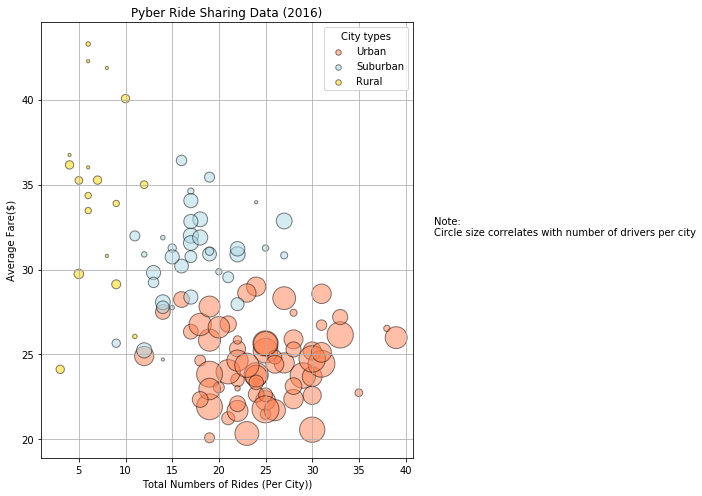

In [14]:
# Build the scatter plots for each city types
# Urban
handles = []
ax = urban_plot_df.plot(kind='scatter', x='Riders By City', y='Average Fare', s=urban_plot_df['Drivers Count']*10
                        , c='Coral', edgecolors='black',alpha = 0.5, label="Urban", figsize=(10,7))

# Suburban
suburban_plot_df.plot(kind='scatter', x='Riders By City', y='Average Fare', s=suburban_plot_df['Drivers Count']*10
                      , c='LightBlue', edgecolors='black',alpha = 0.5, label="Suburban", ax=ax)

# Rural
rural_plot_df.plot(kind='scatter', x='Riders By City', y='Average Fare', s=rural_plot_df['Drivers Count']*10
                   , c='Gold', edgecolors='black', alpha = 0.5, label="Rural", ax=ax)
# legend
lgnd = plt.legend(title="City types", loc=1, scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate the other graph properties

# Chart title
plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")

# Incorporate a text label regarding circle size
plt.text(43,32,"Note:\nCircle size correlates with number of drivers per city")
plt.grid()
plt.tight_layout()
# Save Figure
# Save an image of the chart and print to screen
plt.savefig("../Images/pyber_ride_sharing.png", dpi='figure', transparent=True)

# Show plot

plt.show()

## Total Fares by City Type

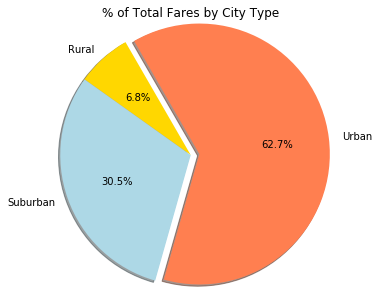

In [9]:
# Calculate Type Percents

total_fares = pybe_df['fare'].sum()

grouped_by_types = pybe_df.groupby('type')
fares_by_type = (grouped_by_types['fare'].sum()/total_fares)*100
fares_by_type

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']

colors = ['Gold', 'Lightblue', 'Coral']

explode = (0, 0, 0.1)

plt.title('% of Total Fares by City Type',pad=30)

plt.pie(fares_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=120, radius=1.5)

# Save Figure
plt.savefig("../Images/total_fares_by_type.png", dpi='figure')

# Show Figure
plt.show()

## Total Rides by City Type

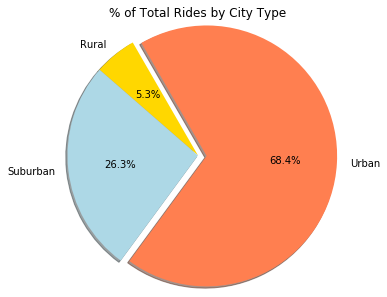

In [10]:
# Calculate Ride Percents
total_rides = pybe_df['ride_id'].count()

rides_by_type = (grouped_by_types['ride_id'].count()/total_rides)*100

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']

colors = ['Gold', 'LightBlue', 'Coral']

explode = (0, 0, 0.1)

plt.title('% of Total Rides by City Type',pad=30)

plt.pie(rides_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120, radius=1.5)

# Save Figure
plt.savefig('../Images/total_rides_by_city_type.png')

# Show Figure
plt.show()

## Total Drivers by City Type

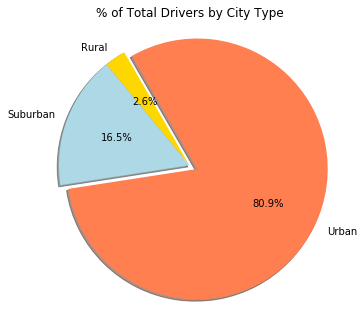

In [11]:
# Calculate Driver Percents
grouped_by_cities = pybe_df.groupby('city')
total_drivers_list = grouped_by_cities['driver_count'].unique()
# print(total_drivers_list)

total_drivers = [total_driver[0] for total_driver in total_drivers_list]
# print(total_drivers)
sum_total_drivers = sum(total_drivers)

city_type_list = grouped_by_cities['type'].unique()
city_types = [city_type[0] for city_type in city_type_list]

combined_type_data = pd.DataFrame({'type':city_types, 'total_drivers':total_drivers})

grouped_drivers = combined_type_data.groupby('type')
grouped_drivers_by_types = grouped_drivers['total_drivers'].sum()
drivers_per_type = (grouped_drivers_by_types/sum_total_drivers)*100

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']

colors = ['Gold', 'Lightblue', 'Coral']

explode = (0, 0, 0.1)

plt.title('% of Total Drivers by City Type',pad=40)

plt.pie(drivers_per_type, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=120, radius=1.5)

# Save Figure
plt.savefig('../Images/total_drivers_by_city_type.png')

# Show Figure
plt.show()